# Assignment 3 - 1B (MLFFNN)

Team members:
- N Sowmya Manojna (BE17B007)
- Thakkar Riya Anandbhai (PH17B010)
- Chaithanya Krishna Moorthy (PH17B011)

## Import Essential Libraries

In [1]:
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

from gridsearch import GridSearch1B

## Reading the data, Splitting it

In [2]:
# Get the data
column_names = ["x1", "x2", "y"]
df = pd.read_csv("../datasets/1B/train.csv", names=column_names)
df_test = pd.read_csv("../datasets/1B/dev.csv", names=column_names)
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

,x1,x2,y
0,0.537115,0.452538,0.0
1,0.380729,0.371252,0.0
2,0.551707,0.496879,0.0
3,0.128153,0.337706,0.0
4,-0.893600,-2.493547,0.0


,x1,x2,y
67,-0.019659,-1.153679,2.0
31,1.436933,1.499611,1.0
75,-2.383817,0.405503,2.0
9,0.749243,-0.226078,0.0
68,-2.163703,1.187660,2.0


,x1,x2,y
40,-0.147620,-0.135928,1.0
22,0.015013,0.068611,0.0
55,2.889180,-0.051103,1.0
70,-2.105578,0.785977,2.0
0,0.438052,-2.337230,0.0


In [3]:
X_train = df[["x1", "x2"]].to_numpy()
y_train = df["y"].to_numpy().astype("int")

X_val = df_val[["x1", "x2"]].to_numpy()
y_val = df_val["y"].to_numpy().astype("int")

X_test = df_test[["x1", "x2"]].to_numpy()
y_test = df_test["y"].to_numpy().astype("int")

## Training the Model

In [4]:
parameters = {"hidden_layer_sizes":[(5,5),(6,6),(7,7),(8,8),(9,9),(10,10)],\
              "activation":["logistic", "relu"], \
              "batch_size":[50, 100, 200], "early_stopping":[True, False], \
              "learning_rate":["constant", "adaptive", "invscaling"], \
              "alpha":[0.01, 0.001]
             }

mlp = MLPClassifier(random_state=1)

clf = GridSearch1B(mlp, parameters)
clf.fit(X_train, y_train, X_val, y_val)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("../parameter_search/1B_MLFFNN_train_val.csv")
result_df.head(10)

100%|██████████| 432/432 [02:33<00:00,  2.81it/s]


,hidden_layer_sizes,activation,batch_size,early_stopping,learning_rate,alpha,accuracy,val_accuracy,sum_accuracy,t_inv
0,"(8, 8)",relu,50,False,adaptive,0.010,99.333333,98.412698,197.746032,1.016082
1,"(8, 8)",relu,50,False,constant,0.001,99.333333,98.412698,197.746032,1.001436
2,"(8, 8)",relu,50,False,invscaling,0.010,99.333333,98.412698,197.746032,0.969625
3,"(8, 8)",relu,50,False,adaptive,0.001,99.333333,98.412698,197.746032,0.939593
4,"(8, 8)",relu,50,False,invscaling,0.001,99.333333,98.412698,197.746032,0.931799
5,"(8, 8)",relu,50,False,constant,0.010,99.333333,98.412698,197.746032,0.910481
6,"(10, 10)",relu,50,False,adaptive,0.010,99.000000,98.412698,197.412698,1.000029
7,"(10, 10)",relu,50,False,constant,0.010,99.000000,98.412698,197.412698,0.993539
8,"(10, 10)",relu,50,False,invscaling,0.010,99.000000,98.412698,197.412698,0.990012
9,"(10, 10)",relu,50,False,constant,0.001,99.000000,96.825397,195.825397,0.995893


In [5]:
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("   - ", i, ": ", clf.best_params_[i], sep="")

best_mlp = MLPClassifier(random_state=1, **clf.best_params_)
best_mlp.fit(X_train, y_train)

Best Parameters Choosen:
   - hidden_layer_sizes: (8, 8)
   - activation: relu
   - batch_size: 50
   - early_stopping: False
   - learning_rate: adaptive
   - alpha: 0.01


MLPClassifier(alpha=0.01, batch_size=50, hidden_layer_sizes=(8, 8),
              learning_rate='adaptive', random_state=1)

Accuracy: 99.33333333333333


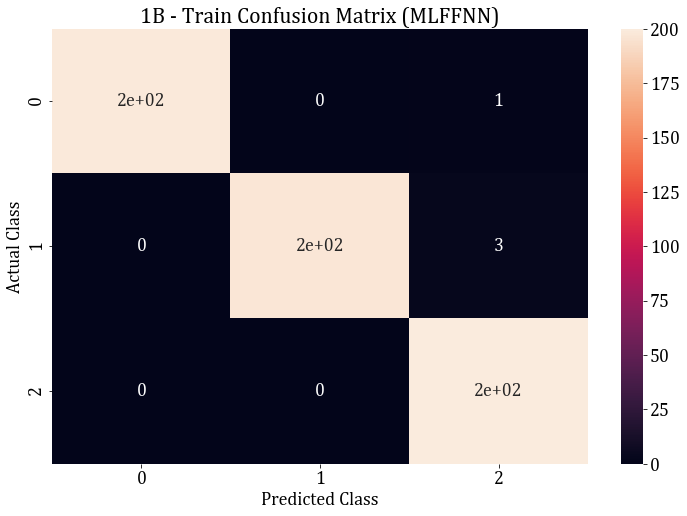

Validation Accuracy: 98.41269841269842


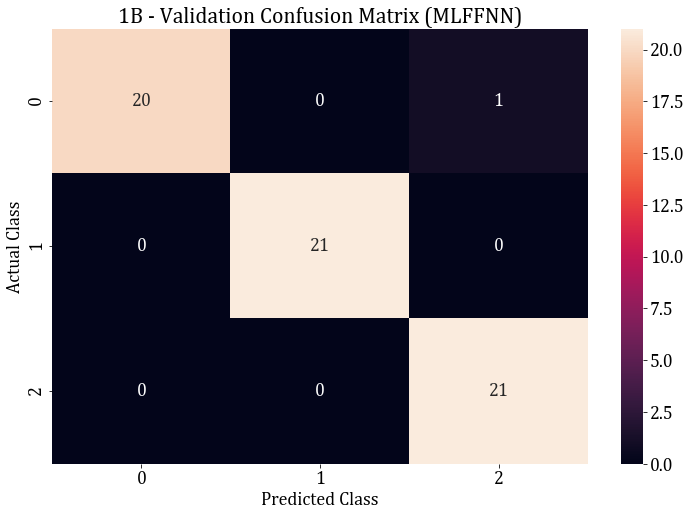

Validation Accuracy: 96.29629629629629


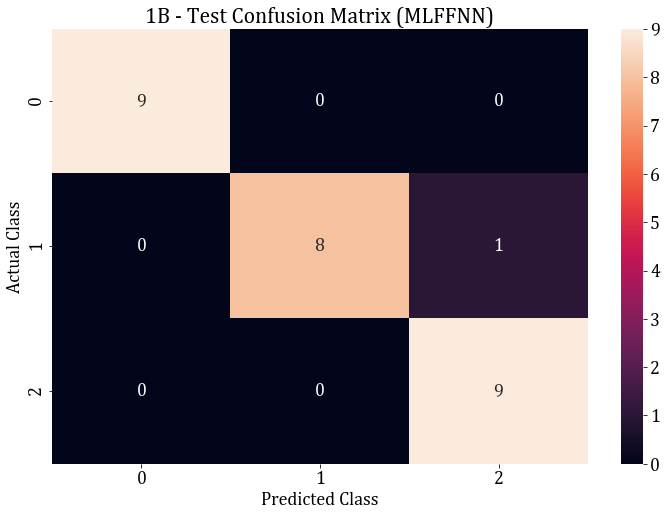

In [6]:
y_pred = best_mlp.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("1B - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_mlp.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure()
sns.heatmap(val_conf_mat, annot=True)
plt.title("1B - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_mlp.predict(X_test)
print("Test Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(test_conf_mat, annot=True)
plt.title("1B - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_test_confmat.png")
plt.show()

## Visualising the decision boundaries

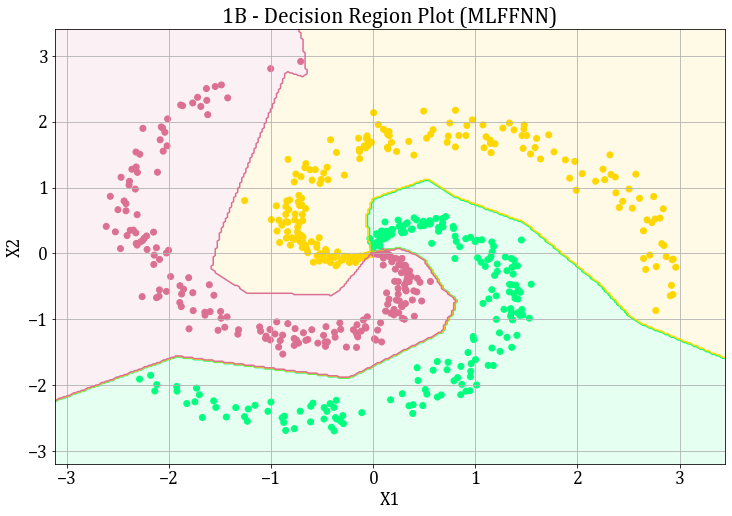

In [7]:
h = 0.02
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pro = np.argmax(best_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z_pro = Z_pro.reshape(xx.shape)

color_list = ["springgreen", "gold", "palevioletred", "cyan"]
plt.title("1B - Decision Region Plot (MLFFNN)")
plt.contourf(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=0.1)
plt.contour(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=1)
plt.scatter(X_train[:,0], X_train[:,1], c=[color_list[i] for i in y_train])
plt.xlabel("X1")
plt.ylabel("X2")
plt.savefig("images/1B_MLFFNN_Decision_Plot.png")
plt.show()